# This notebook calls to the openroute service api

In [5]:
# load necessary modules
import requests
import json

In [6]:
start_loc = '40.723011,-73.990142'
end_loc = '40.717978,-73.992910'

In [23]:
def get_mapquest_route(secret_loc, start_loc, end_loc):
    """Calls to mapquest API to return a JSON of the recommended route.
    
    Args:
        secret_loc: location of file with api key
        start_loc: starting location of the desired walk 
            (long,lat stringw/out spaces)
        end_loc: ending location of the desired walk 
            (long,lat string w/out spaces)
        
    Returns:
        JSON of the recommended path
    """
    base_url = 'http://www.mapquestapi.com/directions/v2/route?'
    with open(secret_loc, "r") as f:
        key = json.load(f)['key']
    url = f"{base_url}key={key}&from={start_loc}&to={end_loc}&routeType=pedestrian"
    response = requests.get(url)
    print(response.status_code, response.reason)
    route_json = json.loads(response.text)
    return route_json

In [16]:
# secret file location
secret_loc_mapquest = "/Users/allisonhonold/.secrets/mapquest_api.json"

route = get_mapquest_route(secret_loc_mapquest, start_loc, end_loc)
route

200 OK
{"route":{"hasTollRoad":false,"hasBridge":false,"boundingBox":{"lr":{"lng":-73.990417,"lat":40.717907},"ul":{"lng":-73.993095,"lat":40.723141}},"distance":0.387,"hasTimedRestriction":false,"hasTunnel":false,"hasHighway":false,"computedWaypoints":[],"routeError":{"errorCode":-400,"message":""},"formattedTime":"00:09:18","sessionId":"5db87b6f-01a9-5f21-02b4-1936-0684448a126e","hasAccessRestriction":false,"realTime":558,"hasSeasonalClosure":false,"hasCountryCross":false,"fuelUsed":0,"legs":[{"hasTollRoad":false,"hasBridge":false,"destNarrative":"","distance":0.387,"hasTimedRestriction":false,"hasTunnel":false,"hasHighway":false,"index":0,"formattedTime":"00:09:18","origIndex":-1,"hasAccessRestriction":false,"hasSeasonalClosure":false,"hasCountryCross":false,"roadGradeStrategy":[[]],"destIndex":-1,"time":558,"hasUnpaved":false,"origNarrative":"","maneuvers":[{"distance":0.387,"streets":["Forsyth St"],"narrative":"Start out going south on Forsyth St toward Stanton St.","turnType":6,"

<Response [200]>

In [22]:
route_json

{'route': {'hasTollRoad': False,
  'hasBridge': False,
  'boundingBox': {'lr': {'lng': -73.990417, 'lat': 40.717907},
   'ul': {'lng': -73.993095, 'lat': 40.723141}},
  'distance': 0.387,
  'hasTimedRestriction': False,
  'hasTunnel': False,
  'hasHighway': False,
  'computedWaypoints': [],
  'routeError': {'errorCode': -400, 'message': ''},
  'formattedTime': '00:09:18',
  'sessionId': '5db87b6f-01a9-5f21-02b4-1936-0684448a126e',
  'hasAccessRestriction': False,
  'realTime': 558,
  'hasSeasonalClosure': False,
  'hasCountryCross': False,
  'fuelUsed': 0,
  'legs': [{'hasTollRoad': False,
    'hasBridge': False,
    'destNarrative': '',
    'distance': 0.387,
    'hasTimedRestriction': False,
    'hasTunnel': False,
    'hasHighway': False,
    'index': 0,
    'formattedTime': '00:09:18',
    'origIndex': -1,
    'hasAccessRestriction': False,
    'hasSeasonalClosure': False,
    'hasCountryCross': False,
    'roadGradeStrategy': [[]],
    'destIndex': -1,
    'time': 558,
    'hasUnp

In [24]:
def get_openrouteservice_route(secret_loc, start_loc, end_loc):
    """Calls to Open Route Service API to return a GeoJSON of the recommended route.
    
    Args:
        secret_loc: location of file with api key
        start_loc: starting location of the desired walk 
            (long,lat stringw/out spaces)
        end_loc: ending location of the desired walk 
            (long,lat string w/out spaces)
        
    Returns:
        geoJSON of the recommended path
    """
    
    base_url = 'https://api.openrouteservice.org/v2/directions/foot-walking?'
    with open(secret_loc, "r") as f:
        key = json.load(f)['key']
    url = f"{base_url}api_key={key}&start={start_loc}&end={end_loc}"
    response = requests.get(url)
    print(response.status_code, response.reason)
    print(response.text)
    return response

In [26]:
secret_loc_openrte = '/Users/allisonhonold/.secrets/openrouteservice_api.json'
route = get_openrouteservice_route(secret_loc_openrte, start_loc, end_loc)
route

500 Internal Server Error
{"error":{"code":2099,"message":null},"info":{"engine":{"version":"5.0.2","build_date":"2019-09-30T11:18:17Z"},"timestamp":1572372948805}}


<Response [500]>

In [49]:
import polyline
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline
from shapely.geometry import LineString

In [30]:
path = polyline.decode("""a~l~Fjk~uOnzh@vlbBtc~@tsE`vnApw{A`dw@~w\\|tNtqf@l{Yd_Fblh@rxo@b}@xxSfytAblk@xxaBeJxlcBb~t@zbh@jc|Bx}C`rv@rw|@rlhA~dVzeo@vrSnc}Axf]fjz@xfFbw~@dz{A~d{A|zOxbrBbdUvpo@`cFp~xBc`Hk@nurDznmFfwMbwz@bbl@lq~@loPpxq@bw_@v|{CbtY~jGqeMb{iF|n\\~mbDzeVh_Wr|Efc\\x`Ij{kE}mAb~uF{cNd}xBjp]fulBiwJpgg@|kHntyArpb@bijCk_Kv~eGyqTj_|@`uV`k|DcsNdwxAott@r}q@_gc@nu`CnvHx`k@dse@j|p@zpiAp|gEicy@`omFvaErfo@igQxnlApqGze~AsyRzrjAb__@ftyB}pIlo_BflmA~yQftNboWzoAlzp@mz`@|}_@fda@jakEitAn{fB_a]lexClshBtmqAdmY_hLxiZd~XtaBndgC""", geojson=True)
path

[(-87.65126, 41.85073),
 (-88.16034, 41.63641),
 (-88.19437, 41.3131),
 (-88.66934, 40.90493),
 (-88.82182, 40.6174),
 (-89.02449, 40.53709),
 (-89.06036, 40.39942),
 (-89.31022, 40.1874),
 (-89.41675, 40.17746),
 (-89.64413, 39.73806),
 (-89.64234, 39.23217),
 (-89.91868, 38.71796),
 (-90.55938, 38.50742),
 (-90.84403, 38.48201),
 (-91.21997, 38.16575),
 (-91.46683, 38.04703),
 (-91.94883, 37.94147),
 (-92.25271, 37.78662),
 (-92.57913, 37.74953),
 (-93.05113, 37.27414),
 (-93.64054, 37.18775),
 (-93.88914, 37.07429),
 (-94.51371, 37.0378),
 (-94.51349, 37.08406),
 (-95.73459, 36.16398),
 (-96.04053, 36.08842),
 (-96.36604, 35.85752),
 (-96.62613, 35.76785),
 (-97.42961, 35.60015),
 (-97.47249, 35.46365),
 (-98.67507, 35.53638),
 (-99.51203, 35.38535),
 (-99.63496, 35.26649),
 (-99.78412, 35.23103),
 (-100.83314, 35.17954),
 (-102.09764, 35.19217),
 (-102.72199, 35.26975),
 (-103.28363, 35.11337),
 (-103.4898, 35.17358),
 (-103.95404, 35.12543),
 (-104.66734, 34.94341),
 (-106.01386, 

In [35]:
practice = gpd.GeoDataFrame(path)

In [34]:
practice.head()

,0,1
0,-87.65126,41.85073
1,-88.16034,41.63641
2,-88.19437,41.31310
3,-88.66934,40.90493
4,-88.82182,40.61740


In [36]:
practice = gpd.GeoDataFrame(practice, geometry=gpd.points_from_xy(practice[0], practice[1]))

In [37]:
practice.head()

,0,1,geometry
0,-87.65126,41.85073,POINT (-87.65126 41.85073)
1,-88.16034,41.63641,POINT (-88.16034 41.63641)
2,-88.19437,41.31310,POINT (-88.19437 41.31310)
3,-88.66934,40.90493,POINT (-88.66934 40.90493)
4,-88.82182,40.61740,POINT (-88.82182 40.61740)


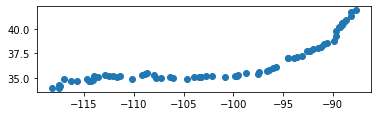

In [40]:
practice.plot()

In [50]:
practice_poly = gpd.GeoSeries(LineString([[p.x, p.y] for p in practice['geometry']]))

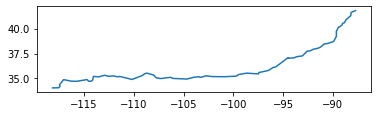

In [51]:
practice_poly.plot()